<h2>Case 1: Heart disease classification</h2>

<h4>Jerry Hällfors
    <br>
03.02.2019
    <br>
Helsinki Metropolia University of Applied Sciences</h4>

<h3>Objective</h3>

The objective of this document is to create and train a dense neural network to predict and classify the presence of heart disease. 
The goal of this assigment is to get familiar with using neural network frameworks.

<h3>Libraries</h3>

The Libraries used in this assigment are as follow:

Keras: Neural network

Pandas: Data handling

Sklearn: Data processing

Matplotlib: Data plotting

In [91]:
from random import shuffle
import time
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from keras.utils import to_categorical, plot_model
from keras import models, layers
from keras.layers import Dropout

<h3>Data</h3>

Data used in this assigment is a dataset of patients with varying degree of heart health, provided by Cleveland Clinic Foundation

In [92]:
# Import data
url = r'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
dataframe = pd.read_csv(url, 
                        sep = ',', 
                        header = None, 
                        index_col = None,
                        na_values = '?')

The Dataset contains 303 instances with 14 attributes:

1 age: age in years       
2 sex: sex (1 = male; 0 = female)       
3 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic        
4 trestbpd: resting blood pressure  
5 chol: serum cholestoral in mg/dl      
6 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
7 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria  
8 thalach: maximum heart rate achieved 
9 exang: exercise induced angina (1 = yes; 0 = no)     
10 oldpeak = ST depression induced by exercise relative to rest   
11 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping     
12 ca: number of major vessels (0-3) colored by flourosopy        
13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      
14 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

In [93]:
# Add column names
name_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal','num']
dataframe.columns = name_list

<h3>Data processing</h3>

The goal of the assigment is focused on categorizing the patients as either healthy or sick and as such all varying degrees of sickness should be categorized as just sick. This is helpful in building a more accurate neural network.

In [94]:
dataframe["num"] = dataframe["num"].mask(dataframe["num"] != 0, 1)

Fill missing values with mean of the collumn

In [95]:
dataframe = dataframe.fillna(dataframe.median())

Describe data

In [96]:
print(dataframe.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg      thalac       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.8750

Shuffle the instances in the dataset to rid of any possible sorting which would confuse the neural network

In [97]:
dataframe = shuffle(dataframe)
print(dataframe.tail())

      age  sex   cp  trestbps   chol  fbs  restecg  thalac  exang  oldpeak  \
164  48.0  1.0  3.0     124.0  255.0  1.0      0.0   175.0    0.0      0.0   
99   48.0  1.0  4.0     122.0  222.0  0.0      2.0   186.0    0.0      0.0   
211  38.0  1.0  1.0     120.0  231.0  0.0      0.0   182.0    1.0      3.8   
75   65.0  0.0  3.0     160.0  360.0  0.0      2.0   151.0    0.0      0.8   
103  71.0  0.0  3.0     110.0  265.0  1.0      2.0   130.0    0.0      0.0   

     slope   ca  thal  num  
164    1.0  2.0   3.0    0  
99     1.0  0.0   3.0    0  
211    2.0  0.0   7.0    1  
75     1.0  0.0   3.0    0  
103    1.0  1.0   3.0    0  


Normalize value ranges in the dataset

In [98]:
data_list = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg',
             'thalac','exang','oldpeak','slope','ca','thal']
data = dataframe[data_list]

data_min = data.min()
data_max = data.max()
data_norm = (data - data_min)/(data_max - data_min)

print(data_norm.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.529978    0.679868    0.719472    0.355564    0.275555    0.148515   
std      0.188305    0.467299    0.320042    0.166035    0.118212    0.356198   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.395833    0.000000    0.666667    0.245283    0.194064    0.000000   
50%      0.562500    1.000000    0.666667    0.339623    0.262557    0.000000   
75%      0.666667    1.000000    1.000000    0.433962    0.340183    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          restecg      thalac       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.495050    0.600055    0.326733    0.167678    0.300330    0.221122   
std      0.497486    0.1746

Visualize distribution sick and healthy instances in the dataset 

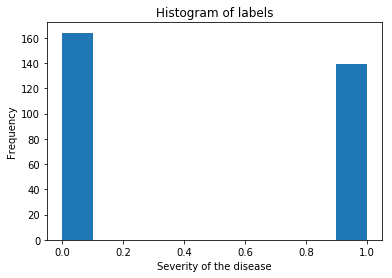

In [99]:
labels = dataframe['num']

plt.hist(labels)
plt.xlabel('Severity of the disease')
plt.ylabel('Frequency')
plt.title('Histogram of labels')
plt.show()

<h3>Models and Training</h3>

The data set is divided 60/30 in two parts. Training set which consists of 200 instances and validation set which consists of 103 instances. The training set is used to train the network and the validation set is used to validate the results of the network.  

In [100]:
one_hot_labels = to_categorical(labels)
one_hot_labels[:2]

train_data = data_norm[:200]
val_data = data_norm[200:]

train_labels = one_hot_labels[:200]
val_labels = one_hot_labels[200:]

The most consistent results of 85% accuracy were gained from a network with 6 hidden layers with a dropout rate of 30% on the first layer. 

The most important factors in reaching a good model was dropout in the first layer, reverse funnel-like shape of the network and low starting neuron count. 

Relu was picked as the activation function for efficiency.

The last layer has 2 neurons representing sick and healthy classifications.

In [101]:
model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_shape=(13,)))
model.add(Dropout(0.3))
model.add(layers.Dense(10))
model.add(layers.Dense(20))
model.add(layers.Dense(30))
model.add(layers.Dense(40))
model.add(layers.Dense(50))
model.add(layers.Dense(60))

model.add(layers.Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_338 (Dense)            (None, 5)                 70        
_________________________________________________________________
dropout_44 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_339 (Dense)            (None, 10)                60        
_________________________________________________________________
dense_340 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_341 (Dense)            (None, 30)                630       
_________________________________________________________________
dense_342 (Dense)            (None, 40)                1240      
_________________________________________________________________
dense_343 (Dense)            (None, 50)                2050      
__________

Categorical crossentropy was used as the loss function of this network due the nature of the problem.

One of the newer and enhanced optimizer, adam, was chosen for this network.

Overfitting was commonly observed after 100 epochs thus 70 or fewer epochs is recommended for this network.

As batch size gets smaller, accuracy of the model gets better with the cost of increasing training time. Smaller batch size than 5 gets exponentially longer to train with only marginal increase in accuracy.

In [102]:
model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

t_start = time.time()
history = model.fit(train_data, train_labels, 
                    epochs = 70, 
                    batch_size = 5, 
                    verbose = 0,
                    validation_data = (val_data, val_labels))
t_end = time.time()
print('Elapsed time: {:.2f} seconds'.format(t_end - t_start))

Elapsed time: 10.84 seconds


<h3>Results</h3>

Best guess: 0.5413
Total accuracy: 0.8614
Confusion matrix:
[[149  15]
 [ 27 112]]
Support:
 [164 139]
Precision: [ 0.847  0.882]
Recall:    [ 0.909  0.806]
F-score:   [ 0.876  0.842]


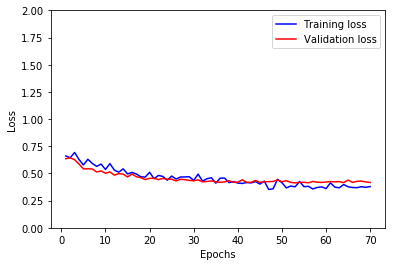

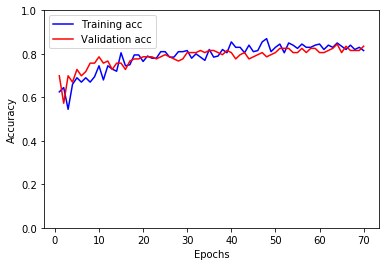

In [103]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

val_predicts = model.predict(data_norm)
y_pred = np.argmax(val_predicts, axis = 1)
cm = confusion_matrix(labels, y_pred)

print('Best guess: {:.4f}'.format(np.sum(labels == 0)/len(labels)))

print('Total accuracy: {:.4f}'.format(np.trace(cm)/np.sum(cm)))
print('Confusion matrix:')
print(cm)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    p, r, f, s = precision_recall_fscore_support(labels, y_pred)

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('Support:\n', s)
print('Precision:', p)
print('Recall:   ', r)
print('F-score:  ', f)


plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

An accuracy of 86 percent was achieved with minimal overfitting and a recall of 80 percent of all sick inviduals.

<h3>Conclusion</h3>

While the model is definitely superior to just quessing patient health status, an effort should be made to achieve a better recall percent for sick inviduals on the next iteration.

Interestingly, not a single model seemed to reach accuracy of more than 85%~ consistently without overfitting.